In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class KNN(object):
    def __init__(self, k=3):
        self.k = k
        self.pontos = None
        self.rotulos = None

    # treinar o modelo
    def fit(self, X, y):
        self.pontos = X
        self.rotulos = y

    @staticmethod
    def dist(p, q):
        return np.sqrt(np.sum((p-q)**2))

    # classificar pontos da matriz X (exemplos,atributos)
    def predict(self, X):
        predicoes = []
        for p in X:
            #calcular a distância entre p e todos os pontos
            #do conjunto de treinamento
            d = [self.dist(p, q) for q in self.pontos]
            #retornar os indíces de d em ordem crescente de
            #distância
            dord = np.argsort(d)
            #pegar apenas os índices dos k vizinhos mais próximos
            knn = dord[:self.k]
            #pegar os rótulos dos k vizinhos mais próximos
            rotulos = self.rotulos[knn]
            #calcular a frequência dos rótulos dos vizinhos mais próximos
            rotulos, cont = np.unique(rotulos, return_counts=True)
            #a predição do ponto p é o rótulo majoritário
            pred = rotulos[np.argmax(cont)]
            predicoes.append(pred)

        return np.array(predicoes)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('./water_potability_nonans.csv')
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
1   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
2   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
3  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
4   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       18.436524       100.341674   4.628771           0  
1       11.558279        31.997993   4.075075           0  
2        8.399735        54.917862   2.559708           0  
3       13.789695        84.603556   2.672989           0  
4       12.363817        62.798309   4.401425           0

In [5]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2011.000000  2011.000000   2011.000000  2011.000000  2011.000000   
mean      7.085990   195.968072  21917.441374     7.134338   333.224672   
std       1.573337    32.635085   8642.239815     1.584820    41.205172   
min       0.227499    73.492234    320.942611     1.390871   129.000000   
25%       6.089723   176.744938  15615.665390     6.138895   307.632511   
50%       7.027297   197.191839  20933.512750     7.143907   332.232177   
75%       8.052969   216.441070  27182.587067     8.109726   359.330555   
max      14.000000   317.338124  56488.672413    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2011.000000     2011.000000      2011.000000  2011.000000  2011.000000  
mean     426.526409       14.357709        66.400859     3.969729     0.403282  
std       80.712572        3.324959        16.077109     0.780346     0.490678  
min      201.619737        2.200000         8.577013     1.450000     0.000000  
25%      366.680307       12.124105        55.952664     3.442915     0.000000  
50%      423.455906       14.322019        66.542198     3.968177     0.000000  
75%      482.373169       16.683049        77.291925     4.514175     1.000000  
max      753.342620       27.006707       124.000000     6.494749     1.000000

# Estudo da base de dados

Para melhor compreenção da base de dados, foi feito um estudo da mesmm a partir de histogramas para cada uma das variáveis, e também a plotagem de gráficos de pares de variáveis, para melhor visualização da relação entre elas.

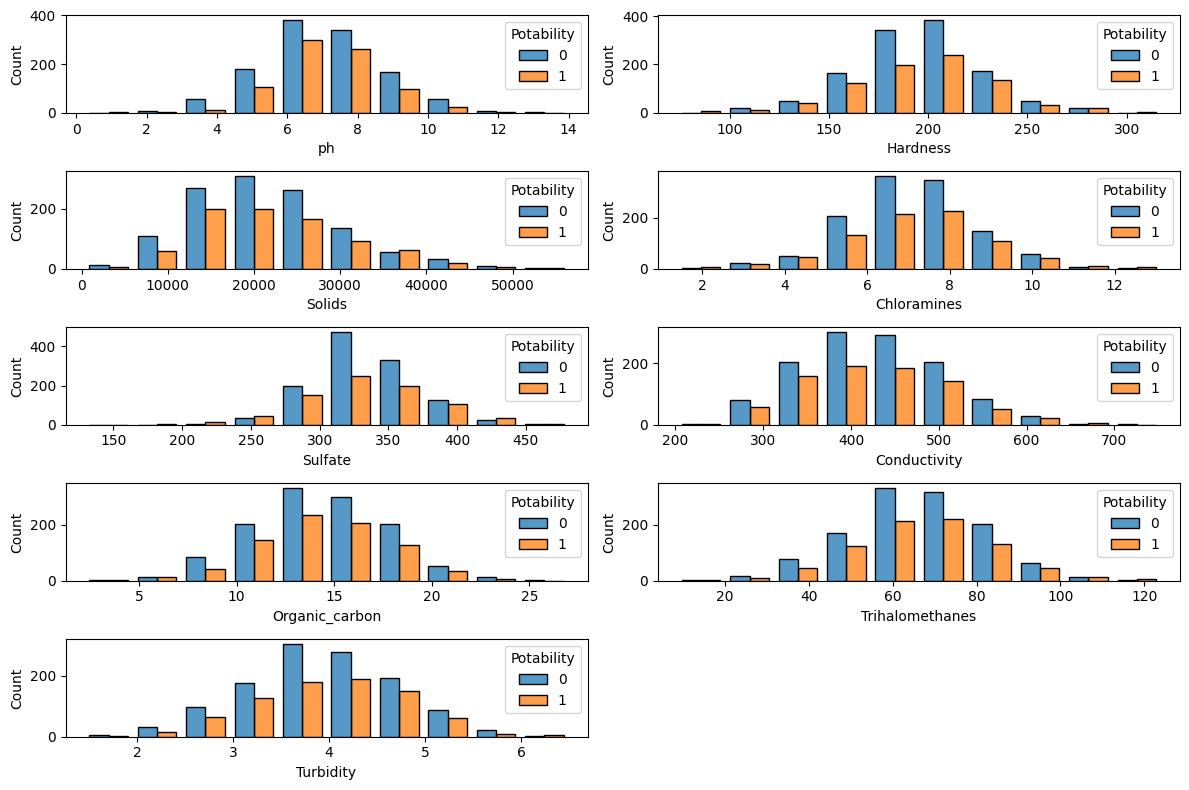

In [6]:
# Para cada atributo, plotar o histograma dos valores para cada classe

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,8))
sns.histplot(data=df, bins=10, x='ph', hue='Potability', multiple='dodge', shrink=0.8, ax=axes[0][0])
sns.histplot(data=df, bins=10, x='Hardness', hue='Potability', multiple='dodge', shrink=0.8,ax=axes[0][1])
sns.histplot(data=df, bins=10, x='Solids', hue='Potability', multiple='dodge', shrink=0.8,ax=axes[1][0])
sns.histplot(data=df, bins=10, x='Chloramines', hue='Potability', multiple='dodge', shrink=0.8,ax=axes[1][1])
sns.histplot(data=df, bins=10, x='Sulfate', hue='Potability', multiple='dodge', shrink=0.8,ax=axes[2][0])
sns.histplot(data=df, bins=10, x='Conductivity', hue='Potability', multiple='dodge', shrink=0.8,ax=axes[2][1])
sns.histplot(data=df, bins=10, x='Organic_carbon', hue='Potability', multiple='dodge', shrink=0.8,ax=axes[3][0])
sns.histplot(data=df, bins=10, x='Trihalomethanes', hue='Potability', multiple='dodge', shrink=0.8,ax=axes[3][1])
sns.histplot(data=df, bins=10, x='Turbidity', hue='Potability', multiple='dodge', shrink=0.8,ax=axes[4][0])
sns.histplot(ax=axes[4][1])
axes[4][1].axis('off')
fig.tight_layout()

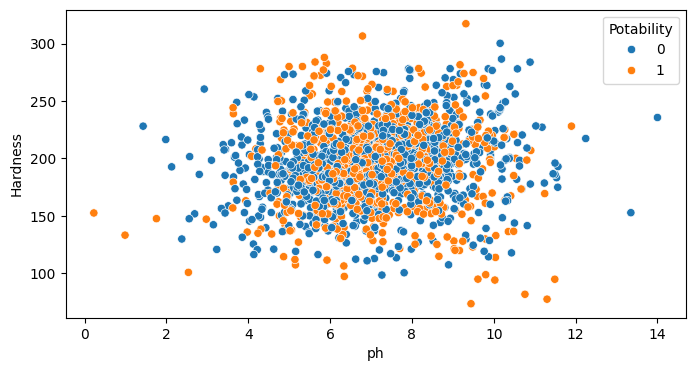

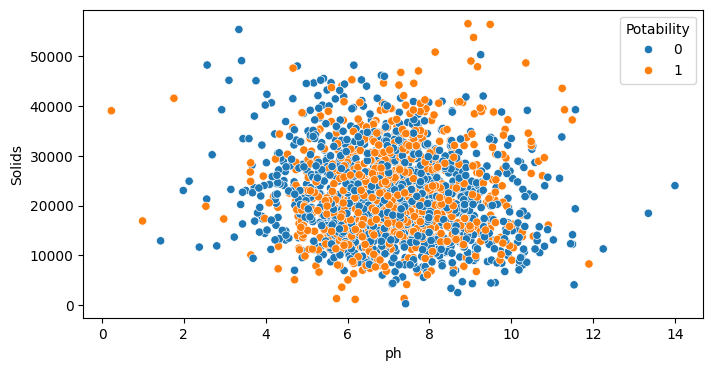

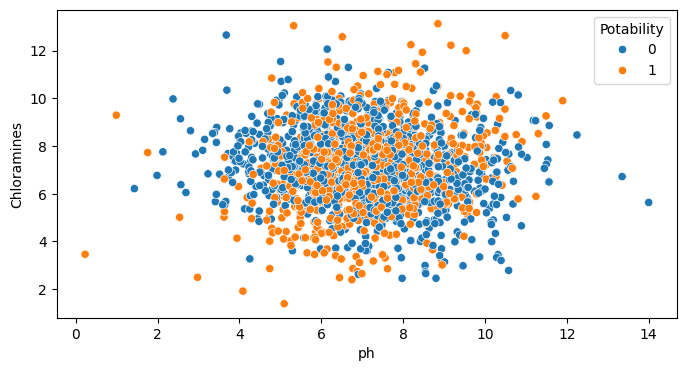

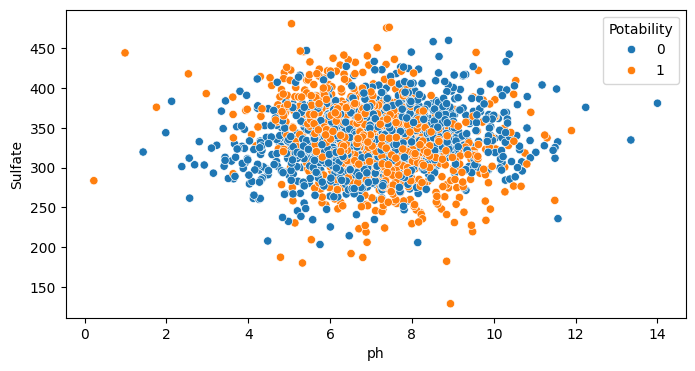

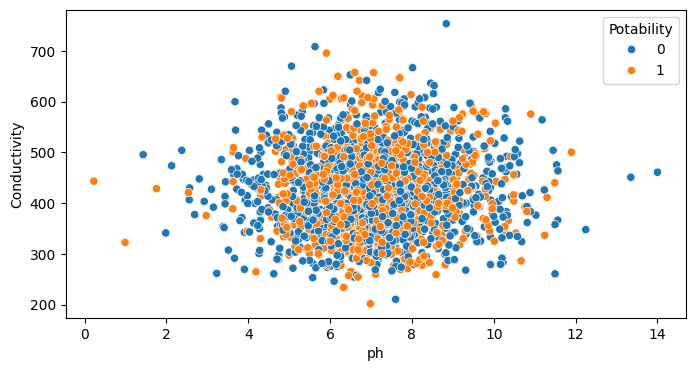

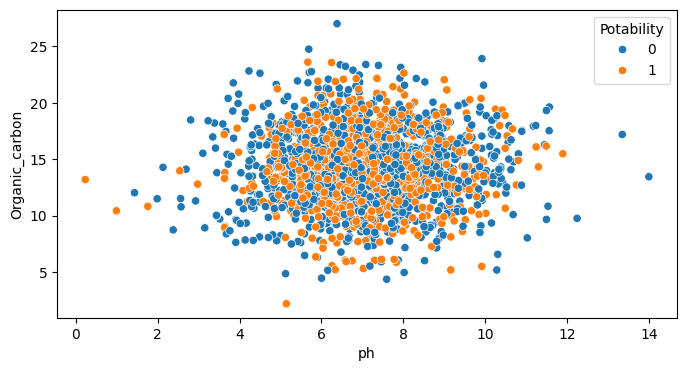

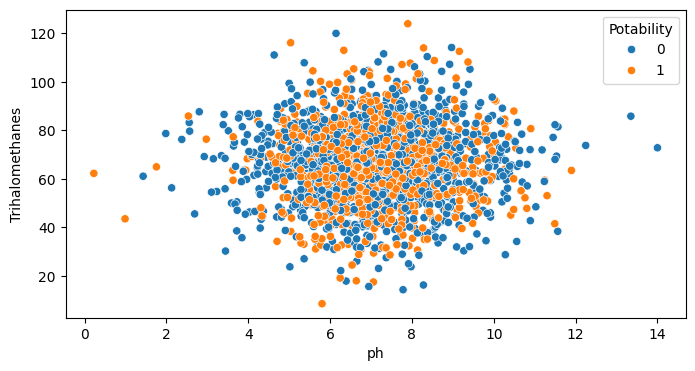

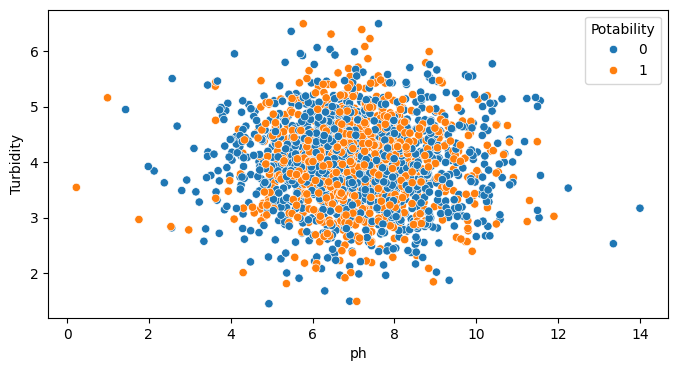

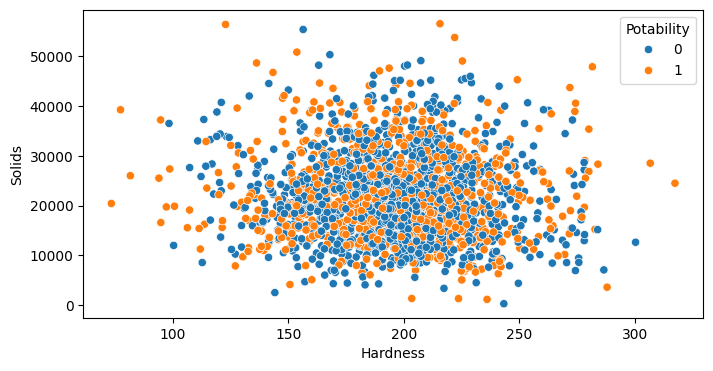

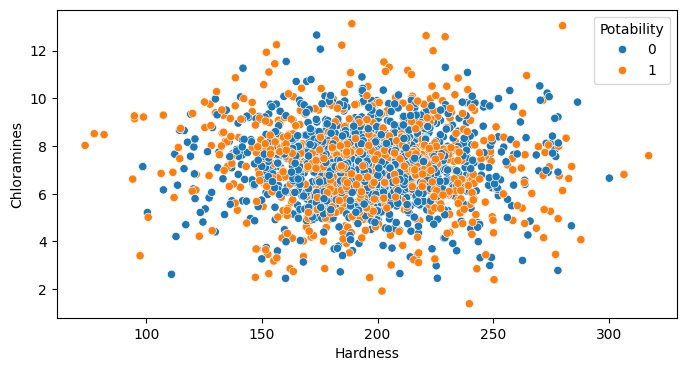

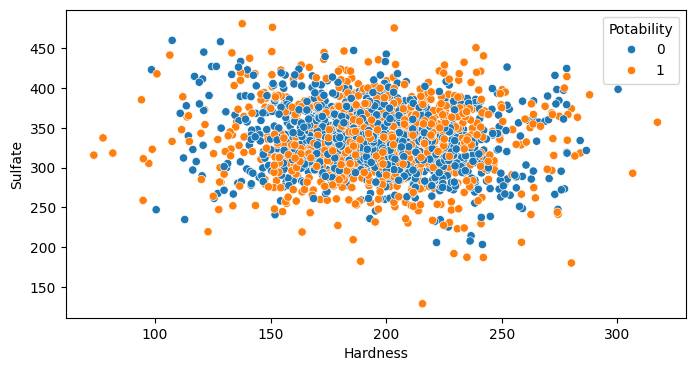

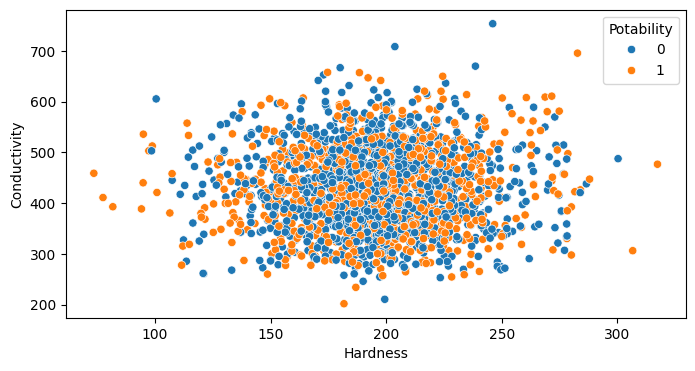

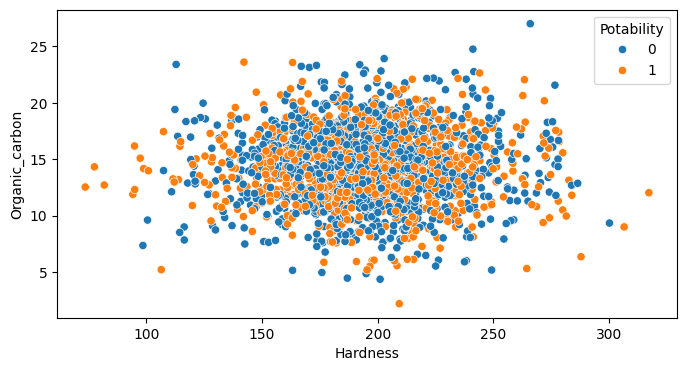

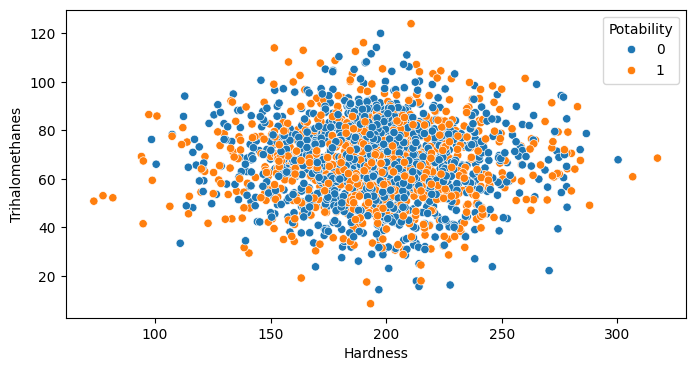

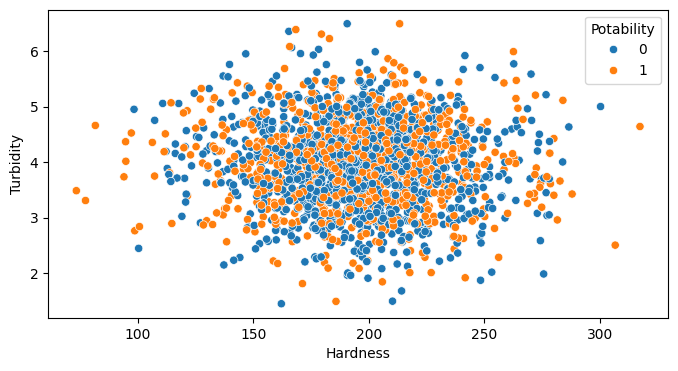

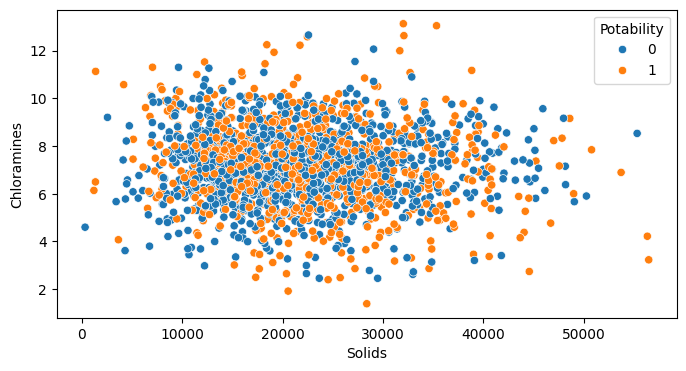

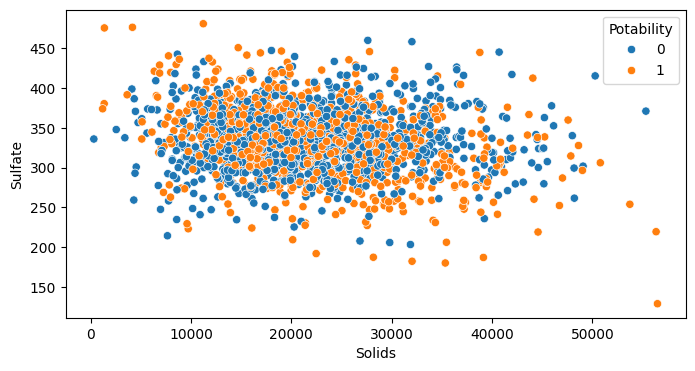

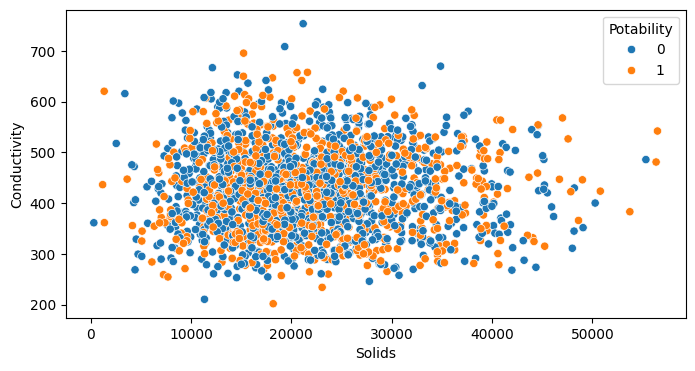

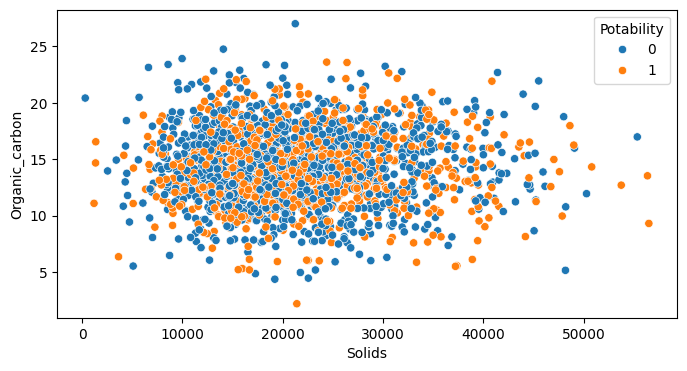

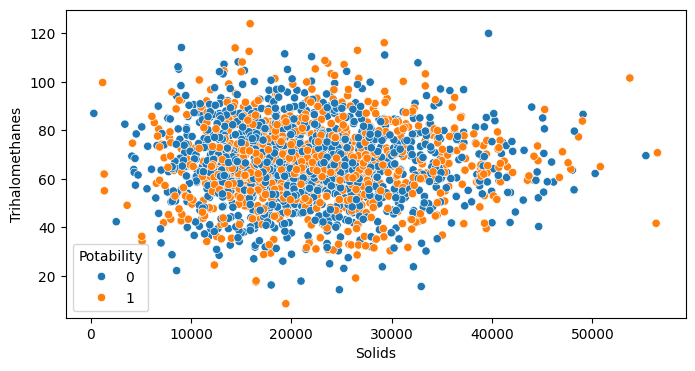

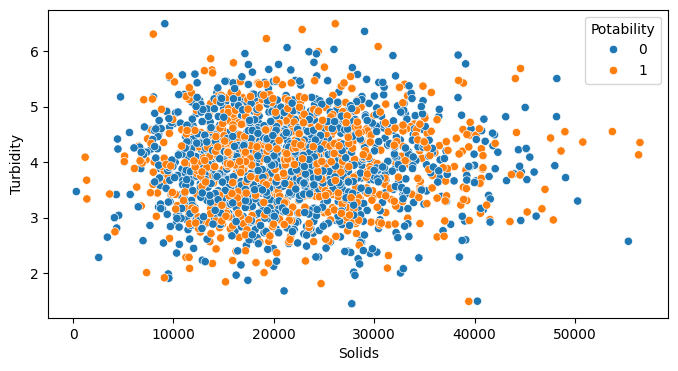

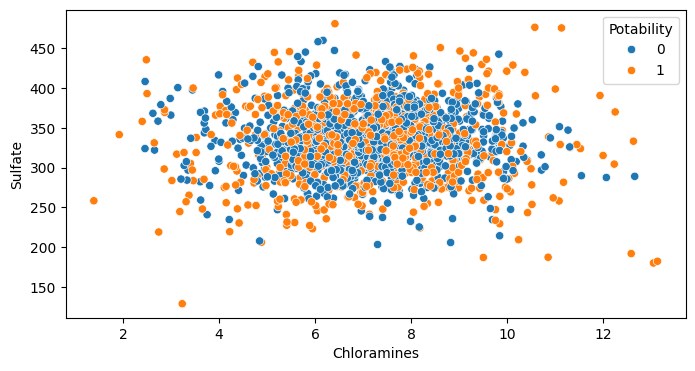

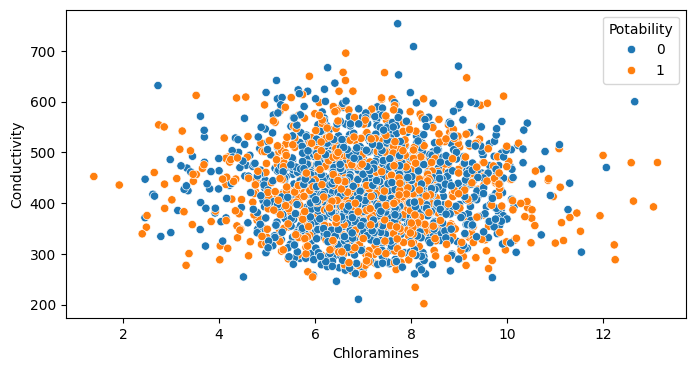

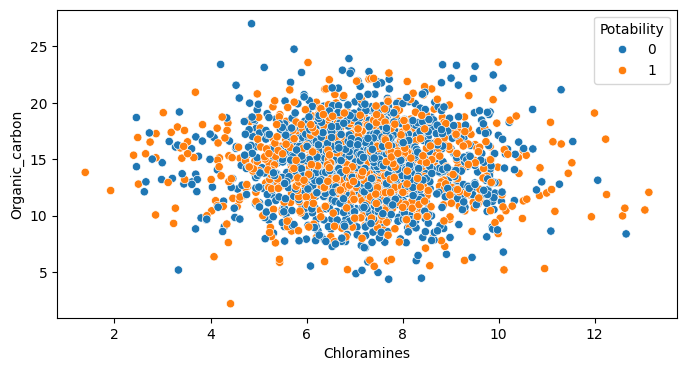

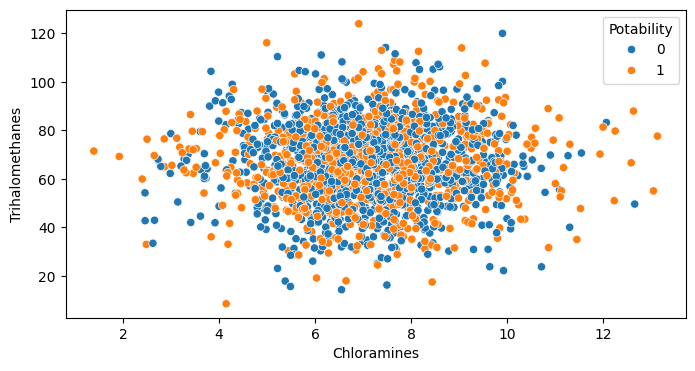

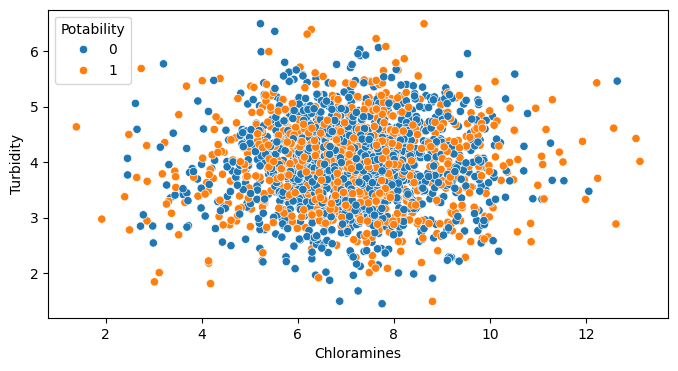

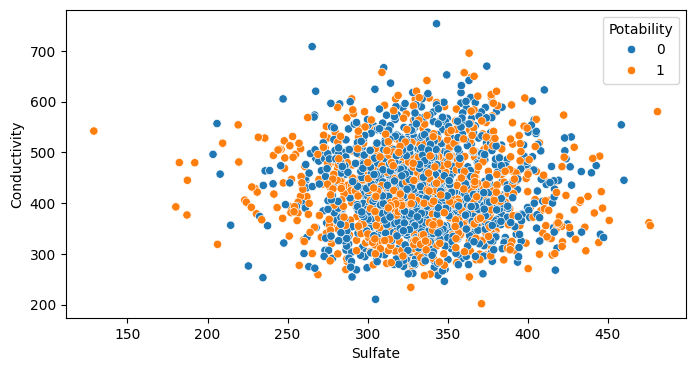

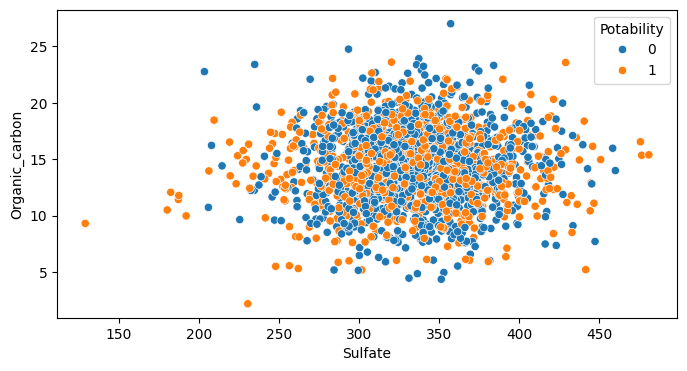

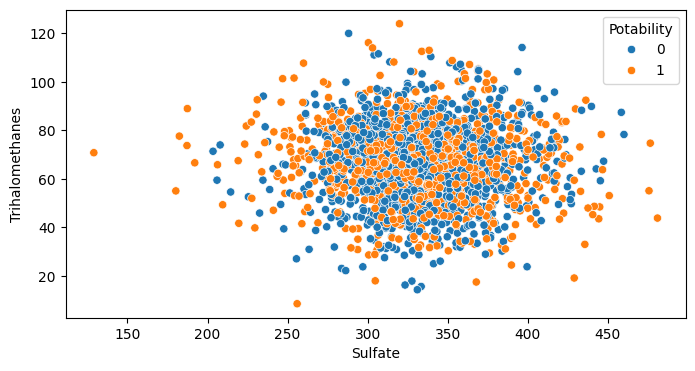

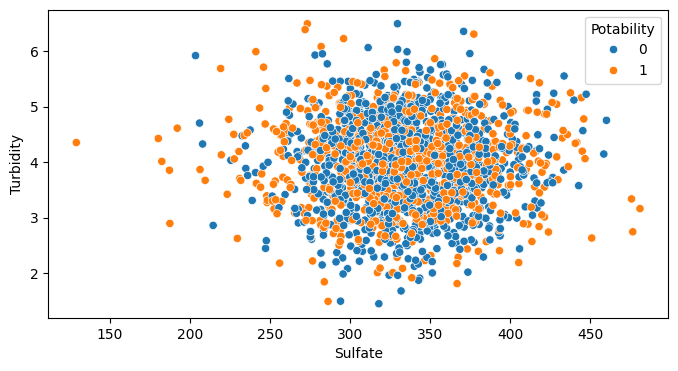

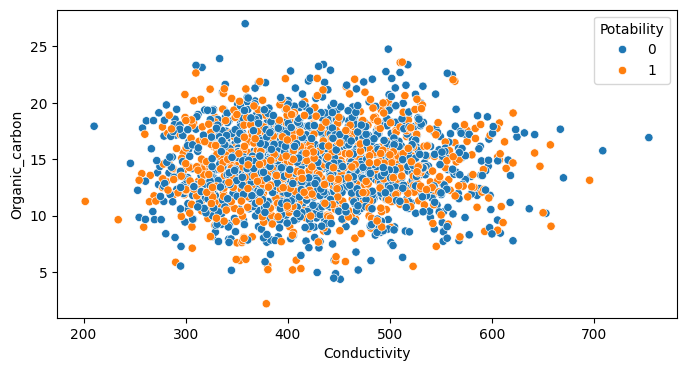

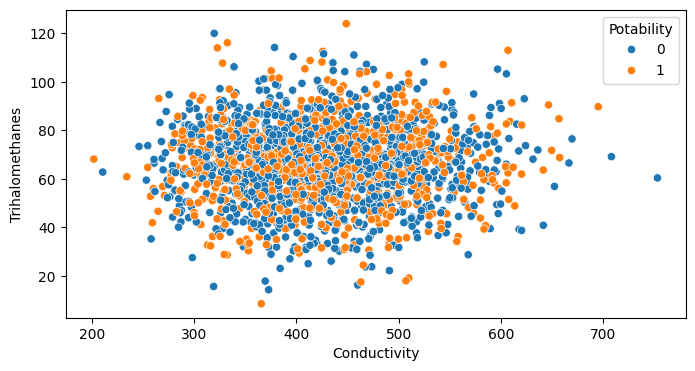

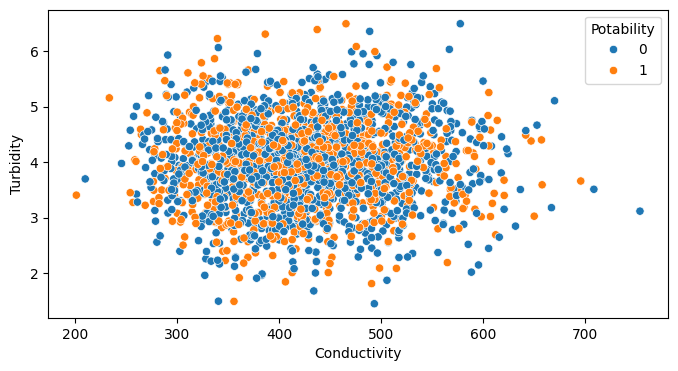

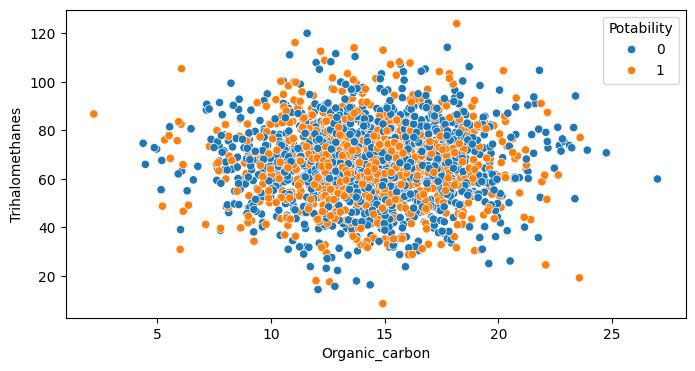

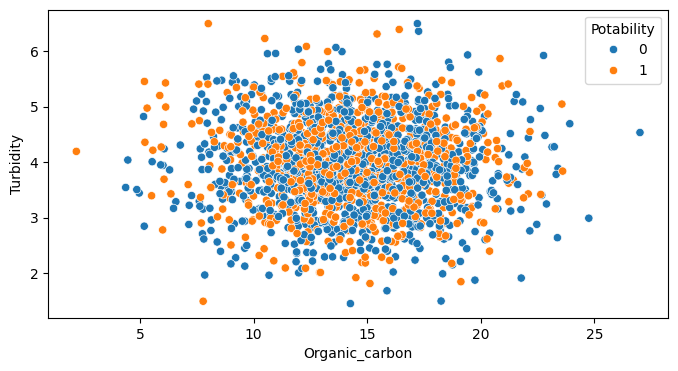

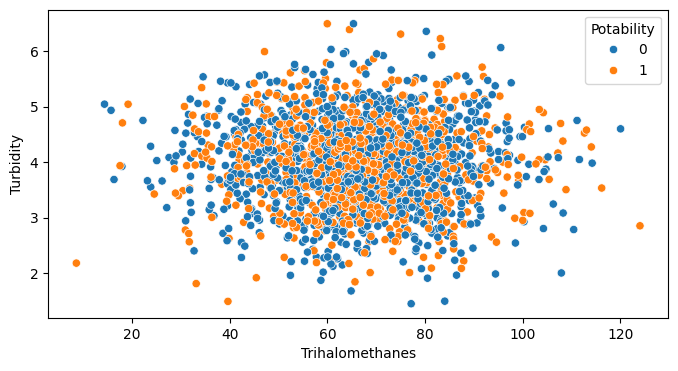

In [7]:
import itertools

pairs = list(itertools.combinations(df.columns[:-1], 2))  # combinações 2 a 2 dos atributos

# Para cada par de atributos, plotar o gráfico de dispersão dos valores para cada classe
for pair in pairs: 
    plt.figure(figsize=(8,4))
    sns.scatterplot(data=df, x=pair[0], y=pair[1], hue='Potability')
    plt.show()

Após a análise dos histograms e dos gráficos dos pares de variáveis, pode ser observado que as variáveis presentes na base de dados não apresentam uma distribuição clara a ponto de facilitar a classificação dos dados. Dito isso, segundo o meu entendimento, o par de atributo que melhor se relaciona com a variável alvo é o par de atributos *Sulfate* e *pH*. Pois no gráfico foi visto que apesar de a distribuição dos dados não ser clara, é possível observar que há uma cincentração maior de uma classe no centro do gráfico, e outra classe mais espalhada para os lados.

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2) # 2 componentes principais
X = df[['ph', 'Sulfate']] # fica com apenas os atributos ph e Sulfate
y = df['Potability'] # rótulos
pca.fit(X) # treina o PCA
# X = df.drop('Potability', axis=1)
# print(X)

PCA(n_components=2)

In [10]:
X_pca = pca.transform(X)
X_pca_df = pd.DataFrame(X_pca, columns=['PC0', 'PC1'])

<Axes: xlabel='PC0', ylabel='PC1'>

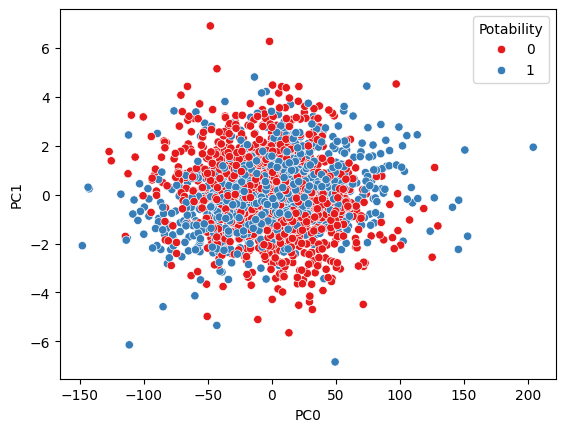

In [11]:
sns.set_palette('seismic')
sns.scatterplot(data=X_pca_df, x='PC0', y='PC1', hue=y, palette='Set1') # visualiza os dados em 2D

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

In [13]:
def selecionar_melhor_k(ks, X_treino, X_val, y_treino, y_val):
    acuracias_val = []

    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_treino, y_treino)
        pred = knn.predict(X_val)
        acuracias_val.append(accuracy_score(y_val, pred))
        
    melhor_val = max(acuracias_val)
    melhor_k = ks[np.argmax(acuracias_val)]        
    knn = KNeighborsClassifier(n_neighbors=melhor_k)
    knn.fit(np.vstack((X_treino, X_val)), [*y_treino, *y_val])
    
    return knn, melhor_k, melhor_val

In [14]:
from sklearn.model_selection import GridSearchCV #busca exaustiva para otimização de hiperparâmetro por validação cruzada

k1 = 10 #controla o número de vias da validação cruzada para estimar o desempenho do modelo
k2 = 5 #controla o número de vida da validação cruzada para otimização de hiperparametros

# usar o protocolo de validação cruzada estratificada
skf = StratifiedKFold(n_splits=k1, shuffle=True, random_state=1)

acuracias = []

# a função split retorna os índices das instâncias que devem ser usadas para o treinamento e o teste.
for idx_treino, idx_teste in skf.split(X, y):
    
    # extrair as instâncias de treinamento de acordo com os índices fornecidos pelo skf.split
    X_treino = X.iloc[idx_treino]
    y_treino = y.iloc[idx_treino]
    
    # extrair as instâncias de teste de acordo com os índices fornecidos pelo skf.split
    X_teste = X.iloc[idx_teste]
    y_teste = y.iloc[idx_teste]
    
    # colocar todas as variáveis na mesma escala, usando o conjunto de treinamento para calcular os parâmetros da escala
    ss = StandardScaler()
    ss.fit(X_treino)
    X_treino = ss.transform(X_treino)
    X_teste = ss.transform(X_teste)
    
    # combinações de parametros otimizar. Aqui estamos apenas otimizando o número de vizinhos mais próximos para o knn (k).
    # Entretanto, podemos colocar todos os valores de todos os parametros. O sklearn se encarrega de gerar todas as combinações.
    params = {'n_neighbors' : range(1,30,2)}
    # instanciar um KNN com parametros padrão
    knn = KNeighborsClassifier()
    # instanciar um GridSearchCV com k2 vias.
    knn = GridSearchCV(knn, params, cv=StratifiedKFold(n_splits=k2))
    # realizar a otimização dos hiperparâmetros e treinar o modelo final com a melhor combinação de hiperparametros com todos os dados de treinamento
    knn.fit(X_treino, y_treino)
    
    # calcular a acurácia no conjunto de testes desta iteração e salvar na lista.
    acuracias.append(accuracy_score(y_teste, knn.predict(X_teste)))
    
#calcular as estatísticas da validação cruzada. Estas estatísticas nos dão uma confiança que, na média, este é o desempenho esperado
#do classificador no mundo real.
print("min: %.2f, max: %.2f, avg +- std: %.2f+-%.2f" % (min(acuracias), max(acuracias), np.mean(acuracias), np.std(acuracias)))

min: 0.59, max: 0.67, avg +- std: 0.64+-0.03
